In [3]:
!pip install Pillow
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

### Loading image files and preprocessing data

In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def load_image (file_path):
    image=Image.open(file_path)
    background = Image.new("RGB", image.size, (255, 255, 255))
    background.paste(image, mask=image.split()[3]) # 3 is the alpha channel
    background=background.convert('1')
    arr=np.array(background)
    image.close()
    return arr

In [3]:
arrays=[None]*10
for i in range(0, 10):
    arrays[i]=[]
    cif_path=os.path.join('dataset', str(i), str(i))
    files=os.listdir(cif_path)
    for file in files:
        file_path=os.path.join(cif_path, file)
        nd_array=load_image(file_path).flatten()
        arrays[i].append(nd_array)

(28, 28)
1


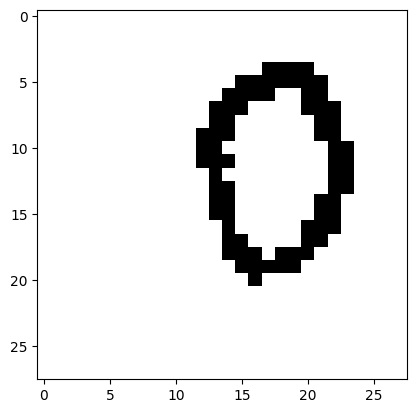

In [4]:
cif_path=os.path.join('dataset', str(0), str(0))
file=os.listdir(cif_path)[0]
file_path=os.path.join(cif_path, file)

arr=load_image(file_path)
image=Image.fromarray(arr)
print (np.shape(arr))
print (image.mode)

plt.imshow(image)
image.close()

In [5]:
data=[]
answer=[]

for i in range(0, 10):
    data.extend(arrays[i])
    answer.extend([i]*len(arrays[i]))
print(len(data))
print(len(answer))

107730
107730


### Starting actual machine learning stuff!

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data_train, data_test, answer_train, answer_test=train_test_split(data, answer, test_size=0.1, shuffle=True)
print (len(data_train), len(data_test))
print (np.shape(data_train))

96957 10773
(96957, 784)


In [7]:
model=KNeighborsClassifier(n_neighbors=10)
#model=RandomForestClassifier()
model.fit(data_train, answer_train)

KNeighborsClassifier(n_neighbors=10)

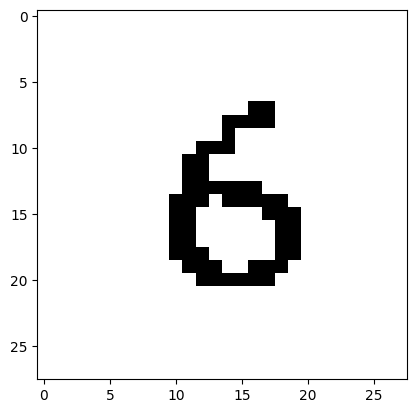

In [8]:
test=load_image('tests/test62.png')
plt.imshow(test, cmap='gray')

6
[0 1 2 3 4 5 6 7 8 9]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


<BarContainer object of 10 artists>

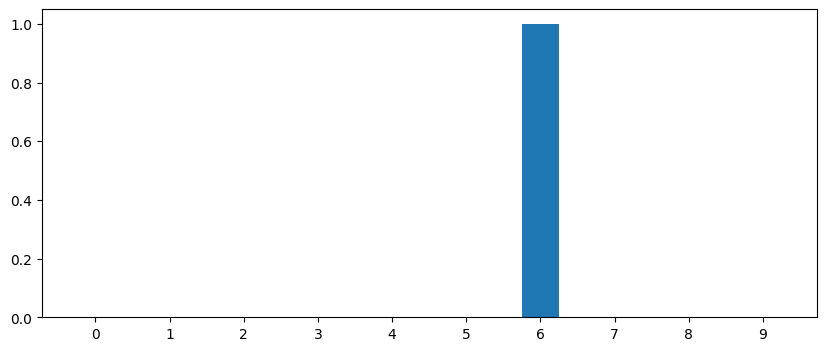

In [9]:
test=test.flatten()
xaxis=np.arange(10)
yaxis=model.predict_proba(np.array([test]))[0]
print (model.predict(np.array([test]))[0])
print(xaxis)
print(yaxis)
fig, ax = plt.subplots(figsize = (10,4))
ax.set_xticks(xaxis)
ax.bar(xaxis, yaxis, width=0.5)

In [ ]:
model.score(data_test, answer_test)

In [ ]:
model.score(data_train, answer_train)

# **Conclusion**

Machine Learning works for Computer Vision problems, but it needs to be VERY similar to the input data.
I should probably try to do some normal machine learning exercise.
And then go to deep learning, neural networks and finally to computer vision and N.

#### PS: When creating test data on https://www.pixilart.com/, YOU NEED TO USE **BRUSH SIZE 1** and 28x28 size

#### PS: Trying to implement this with DeepLearning was a disaster! I need to study PyTorch more.